# 链家网成都二手房可视化分析

导入相应的模块

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [96]:
from IPython.display import display
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [97]:
lianjia_df = pd.read_csv(r'D:/Git/Repositories/lianjia/lianjia/spiders/cd_information.csv')

In [98]:
lianjia_df.head()

,District,Region,Elevator,Floor,Id,Layout,Price,Renovation,Size,Year
0,高新,北,有,高楼层 (共32层),106101048637,4室2厅,660.0,毛坯,202.86㎡,2013年建
1,成华,南,有,中楼层 (共17层),106100964658,2室2厅,95.5,精装,70.99㎡,2006年建
2,金牛,西南,有,高楼层 (共34层),106105123733,1室1厅,92.0,精装,47.32㎡,2009年建
3,新都,南 北,有,中楼层 (共33层),106104381786,4室2厅,128.0,毛坯,97.68㎡,2017年建
4,天府新区,东南,有,低楼层 (共44层),106104217345,3室2厅,193.0,精装,104.96㎡,2015年建


In [99]:
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
District      2991 non-null object
Region        2991 non-null object
Elevator      2988 non-null object
Floor         2991 non-null object
Id            2991 non-null int64
Layout        2991 non-null object
Price         2990 non-null float64
Renovation    2988 non-null object
Size          2991 non-null object
Year          2991 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 233.8+ KB


In [93]:
lianjia_df['Size']

0       202.86
1        70.99
2        47.32
3        97.68
4       104.96
5       131.99
6       106.24
7       123.67
8        88.94
9        79.85
10       89.79
11      153.67
12       94.80
13       82.85
14      115.15
15      108.76
16       46.00
17       82.88
18       48.41
19       73.59
20       61.78
21       67.34
22       80.66
23       51.60
24       87.76
25       80.08
26       81.74
27       79.57
28      125.00
29      134.50
         ...  
2961     71.87
2962    131.74
2963    140.79
2964    104.96
2965     88.70
2966    144.75
2967     76.27
2968     89.00
2969    184.64
2970     73.29
2971    121.00
2972    133.18
2973    110.55
2974    118.70
2975    117.72
2976     84.40
2977    108.93
2978    135.33
2979     58.56
2980    121.72
2981     74.66
2982    124.29
2983    113.03
2984    133.39
2985    106.00
2986    105.08
2987     76.24
2988     88.53
2989     84.52
2990     57.69
Name: Size, Length: 2991, dtype: float64

In [100]:
lianjia_df['Year'] = lianjia_df['Year'].str.extract('(\d+)年建', expand=False)

In [101]:
lianjia_df['Size'] = lianjia_df.Size.apply(lambda x: eval(x.split('㎡')[0]))

In [102]:
lianjia_df

,District,Region,Elevator,Floor,Id,Layout,Price,Renovation,Size,Year
0,高新,北,有,高楼层 (共32层),106101048637,4室2厅,660.0,毛坯,202.86,2013
1,成华,南,有,中楼层 (共17层),106100964658,2室2厅,95.5,精装,70.99,2006
2,金牛,西南,有,高楼层 (共34层),106105123733,1室1厅,92.0,精装,47.32,2009
3,新都,南 北,有,中楼层 (共33层),106104381786,4室2厅,128.0,毛坯,97.68,2017
4,天府新区,东南,有,低楼层 (共44层),106104217345,3室2厅,193.0,精装,104.96,2015
5,锦江,南,有,低楼层 (共11层),106104028521,3室2厅,215.0,简装,131.99,2006
6,新都,东南,有,高楼层 (共18层),106104142987,3室1厅,127.0,简装,106.24,2010
7,双流,东,有,中楼层 (共18层),106103922741,3室2厅,146.0,简装,123.67,2009
8,青羊,南,无,低楼层 (共7层),106102763151,2室2厅,103.5,精装,88.94,2003
9,天府新区,南,无,高楼层 (共6层),106105198611,2室2厅,97.0,简装,79.85,2005


In [103]:
lianjia_df.describe()

,Id,Price,Size
count,2.991000e+03,2990.000000,2991.000000
mean,1.061046e+11,145.767177,90.438415
std,9.054955e+05,78.552518,28.803698
min,1.061002e+11,14.000000,17.790000
25%,1.061044e+11,96.575000,73.775000
50%,1.061050e+11,128.250000,86.680000
75%,1.061051e+11,172.000000,103.510000
max,1.061053e+11,785.000000,382.320000


In [106]:
df = lianjia_df.copy()
df['PerPrice'] = lianjia_df['Price']/lianjia_df['Size']

# 重新摆放列位置
columns = ['Region', 'District', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns = columns)

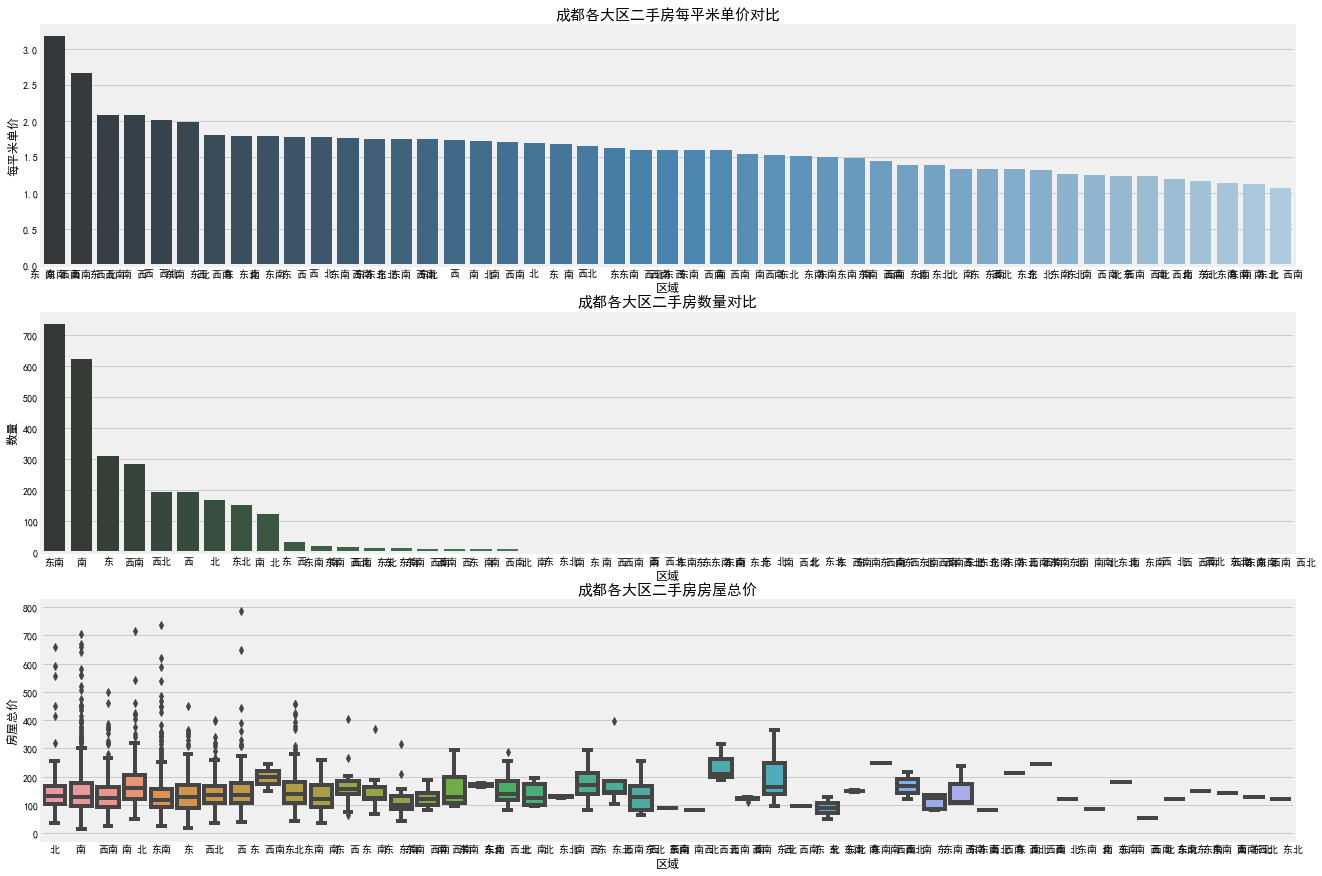

In [107]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='Region', y='PerPrice', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('成都各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='Region', y='Price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('成都各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('成都各大区二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()

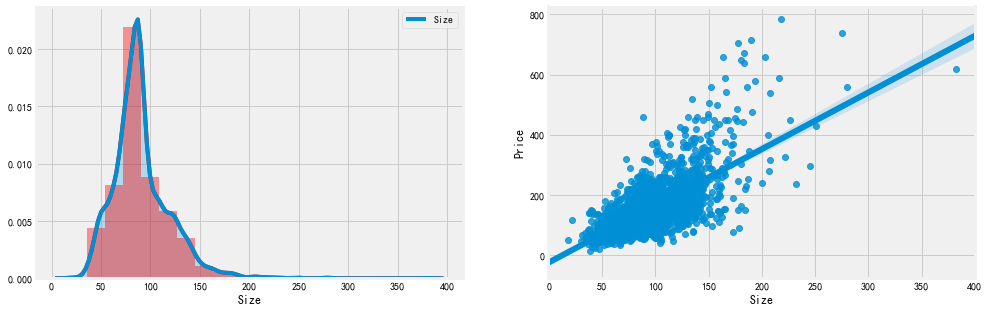

In [110]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 面积的分布情况
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# 面积和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
plt.show()

In [113]:
df.loc[df['Size']>200]

,Region,District,Layout,Floor,Year,Size,Elevator,Renovation,PerPrice,Price
0,北,高新,4室2厅,高楼层 (共32层),2013,202.86,有,毛坯,3.253475,660.0
134,东南,青羊,5室2厅,低楼层 (共3层),NaN,215.87,无,精装,2.723862,588.0
336,西北,天府新区,4室2厅,中楼层 (共31层),2015,206.00,有,毛坯,1.929612,397.5
472,西 西北,高新,3室2厅,低楼层 (共32层),2008,207.93,有,毛坯,1.514933,315.0
876,东南,锦江,4室2厅,高楼层 (共41层),2015,275.00,有,精装,2.683636,738.0
905,西,锦江,3室2厅,中楼层 (共43层),2011,217.87,有,精装,3.603066,785.0
949,东南,高新,5室2厅,高楼层 (共45层),2017,207.91,有,精装,2.597278,540.0
1117,东南,武侯,5室2厅,中楼层 (共29层),2000,221.87,有,简装,1.464822,325.0
1837,南,高新,3室3厅,中楼层 (共44层),2011,280.00,有,毛坯,2.000000,560.0
1845,西南,温江,2室3厅,低楼层 (共5层),2011,206.43,无,精装,1.356392,280.0


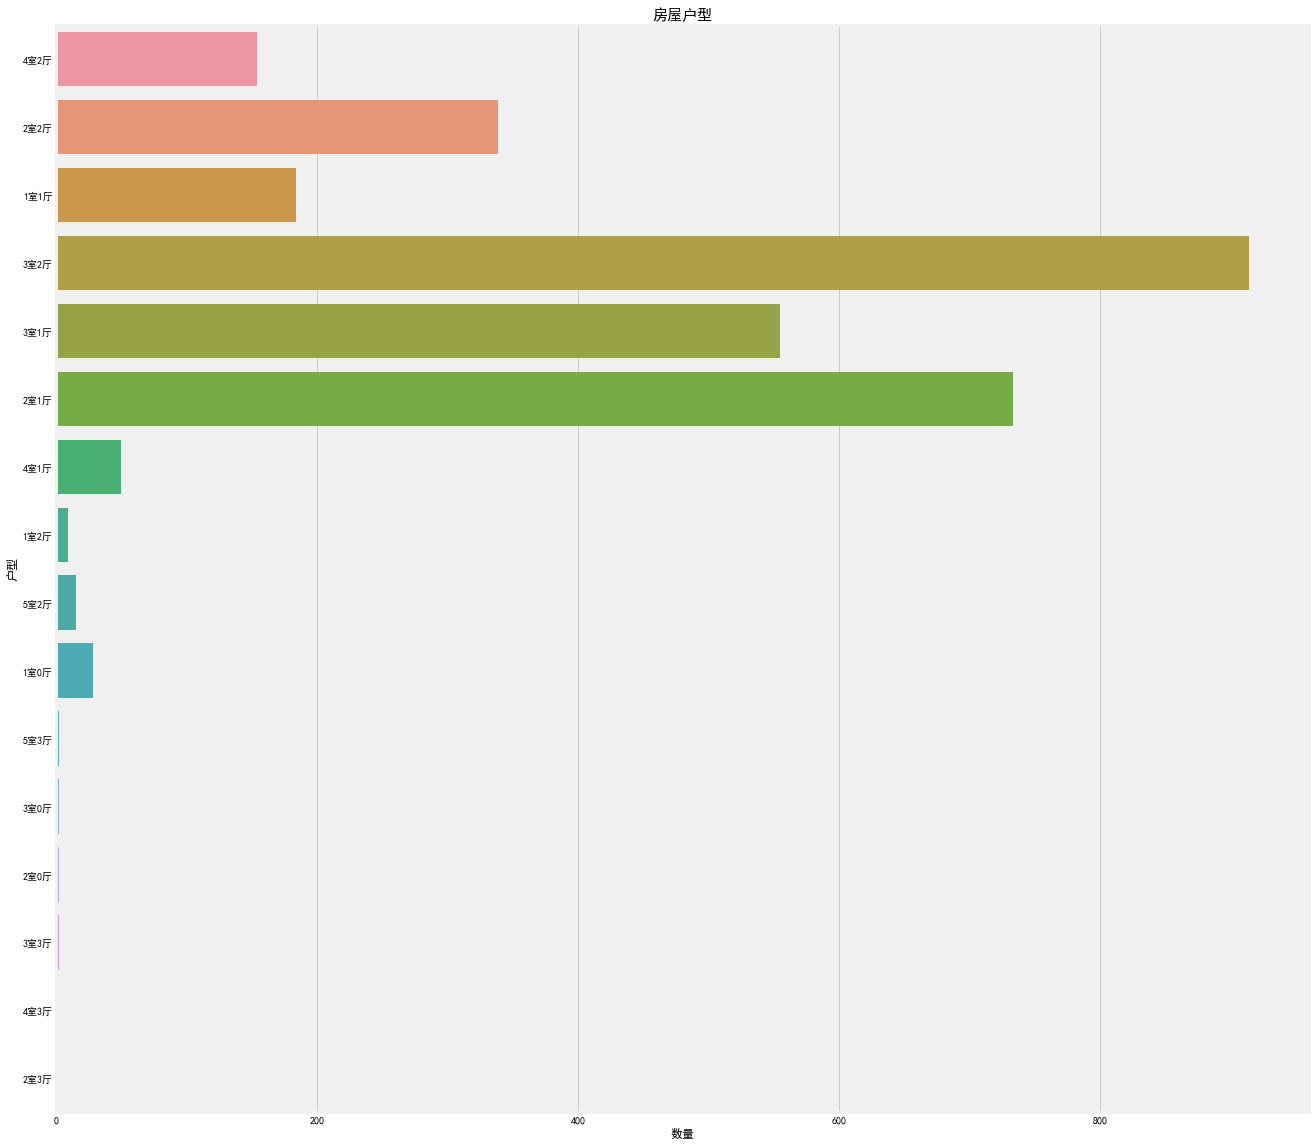

In [114]:
f, ax1= plt.subplots(figsize=(20,20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

In [115]:
df['Renovation'].value_counts()

精装    1755
简装     910
毛坯     323
Name: Renovation, dtype: int64

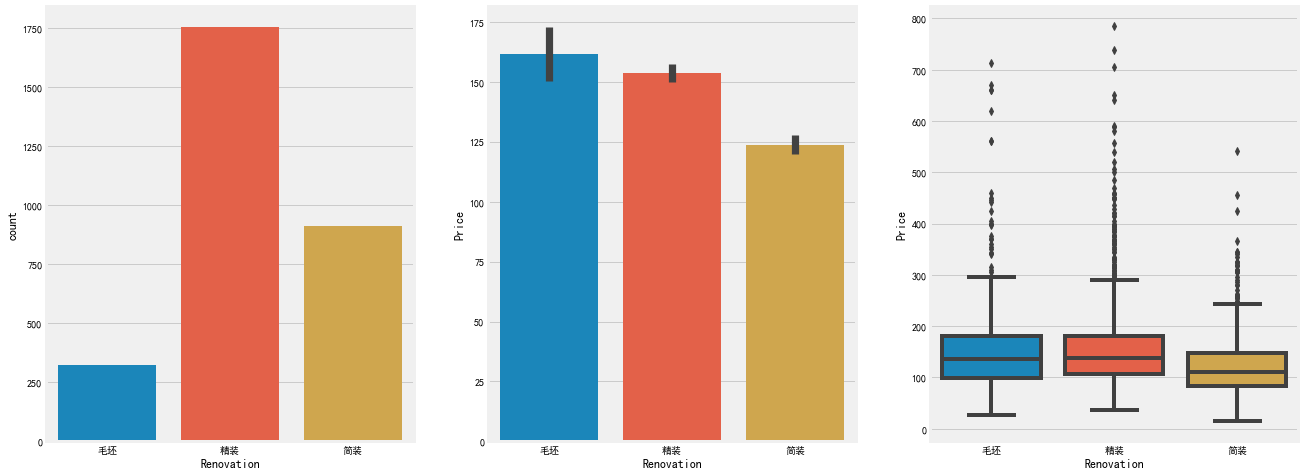

In [116]:
# 画幅设置
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 8))
sns.countplot(df['Renovation'], ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
plt.show()

In [72]:
df['Elevator'].value_counts()

有       2480
无        452
暂无数据      56
Name: Elevator, dtype: int64

In [117]:
df['Floor'] = df['Floor'].str.extract('.*?共(\d+).*?', expand=False)

In [118]:
df.loc[(df['Floor']>str(6))&(df['Elevator']=='暂无数据'), 'Elevator'] = '有'
df.loc[(df['Floor']<=str(6))&(df['Elevator']=='暂无数据'), 'Elevator'] = '无'

In [119]:

df['Elevator'].value_counts()

有    2493
无     495
Name: Elevator, dtype: int64

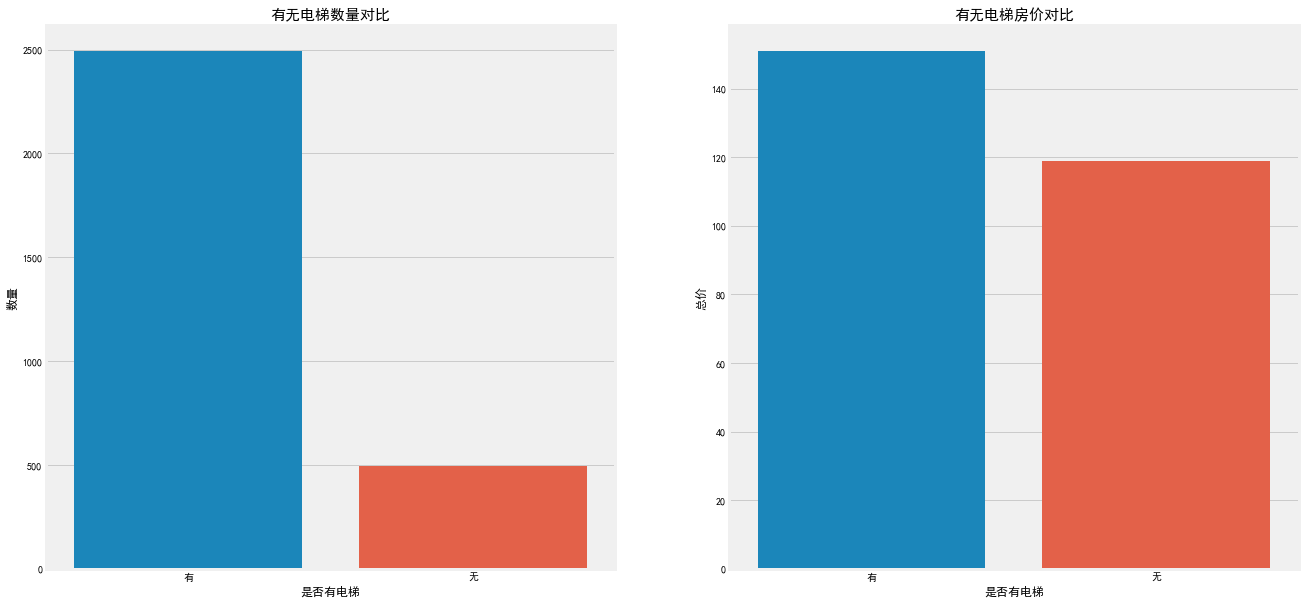

In [120]:

df_mean = df.groupby('Elevator')['Price'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator', y='Price', data=df_mean, ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

In [121]:
df = df[~df['Year'].isnull()]

In [123]:
df['Year'] = df.Year.apply(lambda x: int(x))

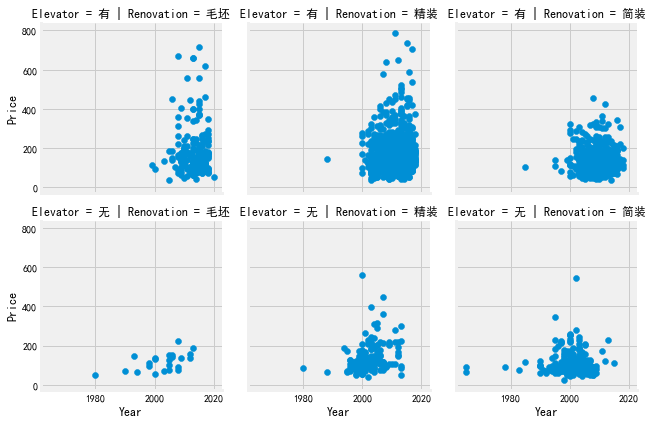

In [125]:

grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic')
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

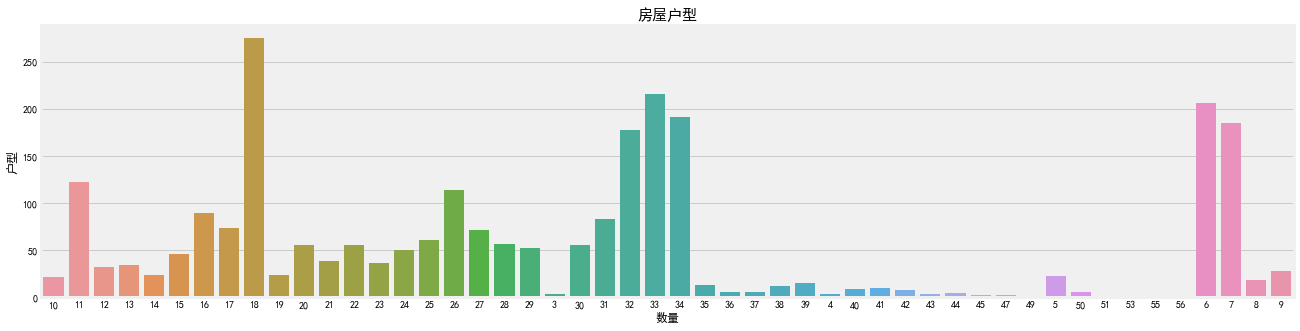

In [126]:
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

In [127]:
df['Floor'] = df.Floor.apply(lambda x: int(x))

In [128]:
df

,Region,District,Layout,Floor,Year,Size,Elevator,Renovation,PerPrice,Price
0,北,高新,4室2厅,32,2013,202.86,有,毛坯,3.253475,660.0
1,南,成华,2室2厅,17,2006,70.99,有,精装,1.345260,95.5
2,西南,金牛,1室1厅,34,2009,47.32,有,精装,1.944210,92.0
3,南 北,新都,4室2厅,33,2017,97.68,有,毛坯,1.310401,128.0
4,东南,天府新区,3室2厅,44,2015,104.96,有,精装,1.838796,193.0
5,南,锦江,3室2厅,11,2006,131.99,有,简装,1.628911,215.0
6,东南,新都,3室1厅,18,2010,106.24,有,简装,1.195407,127.0
7,东,双流,3室2厅,18,2009,123.67,有,简装,1.180561,146.0
8,南,青羊,2室2厅,7,2003,88.94,无,精装,1.163706,103.5
9,南,天府新区,2室2厅,6,2005,79.85,无,简装,1.214778,97.0


In [129]:
df[['Layout_room','Layout_hall']] = df['Layout'].str.extract('(\d)室(\d)厅').astype('int64')

In [130]:
df['Year'] = pd.qcut(df['Year'],8).astype('object')

In [131]:
df

,Region,District,Layout,Floor,Year,Size,Elevator,Renovation,PerPrice,Price,Layout_room,Layout_hall
0,北,高新,4室2厅,32,"(2012.0, 2014.0]",202.86,有,毛坯,3.253475,660.0,4,2
1,南,成华,2室2厅,17,"(2003.0, 2007.0]",70.99,有,精装,1.345260,95.5,2,2
2,西南,金牛,1室1厅,34,"(2007.0, 2009.0]",47.32,有,精装,1.944210,92.0,1,1
3,南 北,新都,4室2厅,33,"(2015.0, 2020.0]",97.68,有,毛坯,1.310401,128.0,4,2
4,东南,天府新区,3室2厅,44,"(2014.0, 2015.0]",104.96,有,精装,1.838796,193.0,3,2
5,南,锦江,3室2厅,11,"(2003.0, 2007.0]",131.99,有,简装,1.628911,215.0,3,2
6,东南,新都,3室1厅,18,"(2009.0, 2011.0]",106.24,有,简装,1.195407,127.0,3,1
7,东,双流,3室2厅,18,"(2007.0, 2009.0]",123.67,有,简装,1.180561,146.0,3,2
8,南,青羊,2室2厅,7,"(1964.999, 2003.0]",88.94,无,精装,1.163706,103.5,2,2
9,南,天府新区,2室2厅,6,"(2003.0, 2007.0]",79.85,无,简装,1.214778,97.0,2,2


In [132]:
df['Region'].value_counts()

东南          647
南           535
东           265
西南          257
西北          182
西           166
东北          148
北           146
南 北         106
东 西          27
东南 南         18
东南 西北        16
东 东南         14
西南 东北        13
东 南          10
东南 西南         9
西南 西          9
南 西南          8
南 东           5
东 东北          5
南 西           4
西南 南          4
西 西北          3
北 南           3
东南 东北         2
北 东北          2
东 西南          2
东南 东          2
南 西北          2
东 东南 南        2
东 北           2
东 南 西 北       1
西 西南          1
西南 西北         1
南 东南          1
东 东南 西南       1
西 北           1
西南 东南         1
南 东北          1
东 南 西南        1
东北 东南         1
东南 西南 西北      1
东南 南 北        1
东南 北          1
东北 东南 西南      1
Name: Region, dtype: int64

In [133]:
# 根据已有特征创建新特征
df['Layout_total'] = df['Layout_room'] + df['Layout_hall']
df['Size_room_ratio'] = df['Size']/df['Layout_total']

# 删除无用特征
df = df.drop(['Layout','PerPrice'],axis=1)

In [134]:
df

,Region,District,Floor,Year,Size,Elevator,Renovation,Price,Layout_room,Layout_hall,Layout_total,Size_room_ratio
0,北,高新,32,"(2012.0, 2014.0]",202.86,有,毛坯,660.0,4,2,6,33.810000
1,南,成华,17,"(2003.0, 2007.0]",70.99,有,精装,95.5,2,2,4,17.747500
2,西南,金牛,34,"(2007.0, 2009.0]",47.32,有,精装,92.0,1,1,2,23.660000
3,南 北,新都,33,"(2015.0, 2020.0]",97.68,有,毛坯,128.0,4,2,6,16.280000
4,东南,天府新区,44,"(2014.0, 2015.0]",104.96,有,精装,193.0,3,2,5,20.992000
5,南,锦江,11,"(2003.0, 2007.0]",131.99,有,简装,215.0,3,2,5,26.398000
6,东南,新都,18,"(2009.0, 2011.0]",106.24,有,简装,127.0,3,1,4,26.560000
7,东,双流,18,"(2007.0, 2009.0]",123.67,有,简装,146.0,3,2,5,24.734000
8,南,青羊,7,"(1964.999, 2003.0]",88.94,无,精装,103.5,2,2,4,22.235000
9,南,天府新区,6,"(2003.0, 2007.0]",79.85,无,简装,97.0,2,2,4,19.962500


In [135]:
pd.get_dummies(df)

,Floor,Size,Price,Layout_room,Layout_hall,Layout_total,Size_room_ratio,Region_东,Region_东 东北,Region_东 东南,...,"Year_(2009.0, 2011.0]","Year_(2011.0, 2012.0]","Year_(2012.0, 2014.0]","Year_(2014.0, 2015.0]","Year_(2015.0, 2020.0]",Elevator_无,Elevator_有,Renovation_毛坯,Renovation_简装,Renovation_精装
0,32,202.86,660.0,4,2,6,33.810000,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,17,70.99,95.5,2,2,4,17.747500,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,34,47.32,92.0,1,1,2,23.660000,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,33,97.68,128.0,4,2,6,16.280000,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,44,104.96,193.0,3,2,5,20.992000,0,0,0,...,0,0,0,1,0,0,1,0,0,1
5,11,131.99,215.0,3,2,5,26.398000,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6,18,106.24,127.0,3,1,4,26.560000,0,0,0,...,1,0,0,0,0,0,1,0,1,0
7,18,123.67,146.0,3,2,5,24.734000,1,0,0,...,0,0,0,0,0,0,1,0,1,0
8,7,88.94,103.5,2,2,4,22.235000,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,6,79.85,97.0,2,2,4,19.962500,0,0,0,...,0,0,0,0,0,1,0,0,1,0
